In [ ]:
###############################################################################################################
# Audio-driven upper-body motion synthesis on a humanoid robot
# Computer Science Tripos Part III Project
# Jan Ondras (jo356@cam.ac.uk), Trinity College, University of Cambridge
# 2017/18
###############################################################################################################
# Results (tables, plots) from testing of all four model types. 
###############################################################################################################

In [1]:
import numpy as np
import time
import glob
import matplotlib.pyplot as plt
from tabulate import tabulate
from evalutils import plot_4RMSE, calculate_norm_delta_jerk_onList

model_types = [
    'MLP SI',
    'LSTM SI',
    'MLP SD',
    'LSTM SD'
]

TE_folder = 'TrainingExamples_16kHz'
unique_srt_VIDs = np.load('./../Dataset/'+TE_folder+'/te_unique_srt_VIDs.npz')['unique_srt_VIDs']
unique_srt_SIDs = np.array([x[:5] for i, x in enumerate(unique_srt_VIDs) if i % 2 == 0]) # ['PID02', 'PID05', ..

DATA = {} # stores all measures for all model types

for m in model_types:
    DATA[m] = np.zeros( ( len(unique_srt_SIDs), 5+11 ) ) # loss, RMSE, deltaLCCAxy, LCCAyy, deltaJerk

##########################################################################################
# MLP_SI
# TESTING
##########################################################################################

m = 'MLP SI'
save_results_path_prefix = './../Dataset/'+TE_folder+'/Results/MLP_SI/cvTest/'
for s, SID in enumerate(unique_srt_SIDs):
    dd = np.load(save_results_path_prefix + 'test_' + SID + '.npz')
    DATA[m][s, 0] = dd['test_loss']
    DATA[m][s, 1] = dd['results_smooth'][1][0]
    DATA[m][s, 2] = abs(dd['results_smooth'][3]['XYt'][0] - dd['results_smooth'][3]['XYp'][0])  
    DATA[m][s, 3] = dd['results_smooth'][3]['YtYp'][0]
    #DATA[m][s, 4] = np.sum( dd['results_smooth'][4]['delta'] ) # sum over all angles
    # RECALCULATE JERK
    Y_true_list = dd['Y_true_list']
    Y_pred_list = dd['Y_smooth_list']
    DATA[m][s, 4] = np.sum( calculate_norm_delta_jerk_onList(Y_true_list, Y_pred_list) )
    DATA[m][s, 5:] = dd['results_smooth'][0][0]
    
##########################################################################################
# LSTM_SI
# TESTING
##########################################################################################

m = 'LSTM SI'
save_results_path_prefix = './../Dataset/'+TE_folder+'/Results/LSTM_SI/cvTest/'
for s, SID in enumerate(unique_srt_SIDs):
    dd = np.load(save_results_path_prefix + 'test_' + SID + '.npz')
    DATA[m][s, 0] = dd['test_loss']
    DATA[m][s, 1] = dd['results_smooth'][1][0]
    DATA[m][s, 2] = abs(dd['results_smooth'][3]['XYt'][0] - dd['results_smooth'][3]['XYp'][0])  
    DATA[m][s, 3] = dd['results_smooth'][3]['YtYp'][0]
    #DATA[m][s, 4] = np.sum( dd['results_smooth'][4]['delta'] )
    # RECALCULATE JERK
    Y_true_list = dd['Y_true_list']
    Y_pred_list = dd['Y_smooth_list']
    DATA[m][s, 4] = np.sum( calculate_norm_delta_jerk_onList(Y_true_list, Y_pred_list) )
    DATA[m][s, 5:] = dd['results_smooth'][0][0]
    
##########################################################################################
# MLP_SD
# TESTING
##########################################################################################

m = 'MLP SD'
tuning_type = '1_35_AF26'
save_results_path_prefix = './../Dataset/'+TE_folder+'/Results/MLP_SD/XXX'
for s, SID in enumerate(unique_srt_SIDs):
    dd = np.load(save_results_path_prefix + 'MSBMtest_' + SID + '_' + tuning_type + '.npz')
    DATA[m][s, 0] = dd['test_loss']
    DATA[m][s, 1] = dd['results_smooth'][1][0]
    DATA[m][s, 2] = abs(dd['results_smooth'][3]['XYt'][0] - dd['results_smooth'][3]['XYp'][0])  
    DATA[m][s, 3] = dd['results_smooth'][3]['YtYp'][0]
    DATA[m][s, 5:] = dd['results_smooth'][0][0]
    
    # RECALCULATED JERK
    Y_true_list = dd['Y_true_list']
    Y_pred_list = dd['Y_smooth_list']
    DATA[m][s, 4] = np.sum( calculate_norm_delta_jerk_onList(Y_true_list, Y_pred_list) )

##########################################################################################
# LSTM_SD
# TESTING
##########################################################################################

m = 'LSTM SD'
tuning_type = '1_26_12'
save_results_path_prefix = './../Dataset/'+TE_folder+'/Results/LSTM_SD/'
for s, SID in enumerate(unique_srt_SIDs):
    dd = np.load(save_results_path_prefix + 'MSBMtest_' + tuning_type + '_' + SID + '.npz')
    DATA[m][s, 0] = dd['test_loss']
    DATA[m][s, 1] = dd['results_smooth'][1][0]
    DATA[m][s, 2] = abs(dd['results_smooth'][3]['XYt'][0] - dd['results_smooth'][3]['XYp'][0])  
    DATA[m][s, 3] = dd['results_smooth'][3]['YtYp'][0]
    DATA[m][s, 5:] = dd['results_smooth'][0][0]
    
    # RECALCULATED JERK
    Y_true_list = dd['Y_true_list']
    Y_pred_list = dd['Y_smooth_list']
    DATA[m][s, 4] = np.sum( calculate_norm_delta_jerk_onList(Y_true_list, Y_pred_list) )


/home/ubuntu/anaconda3/envs/tensorflow_p27/lib/python2.7/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p27/lib/python2.7/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [2]:
########################################################################################
# Print tables

headers = [
    'Model', 
    'Loss', 
    'RMSE', 
    'Delta LCCA',
    'LCCA (Yt,Yp)',
    'Delta jerk'
]
model_types = [
    'MLP SI',
    'LSTM SI',
    'MLP SD',
    'LSTM SD'
]
model_types_tab = [
    'MLP-SI',
    'LSTM-SI',
    'MLP-SD',
    'LSTM-SD'
]
print "EVALUATION ON TESTING SET (averaged over all subjects)"
# MEANS
print "MEANS"
tab_data = []
for m in model_types:
    tab_data.append( 
        np.mean( DATA[m][:, :5], axis=0 ) # average over subjects, keep 11 angles
    )
print tabulate(tab_data, headers=headers, 
               tablefmt='fancy_grid', 
               showindex=model_types_tab, 
               numalign='center'
              )
print tabulate(tab_data, headers=headers, 
               tablefmt='latex_booktabs', 
               showindex=model_types_tab, 
               numalign='center'
              )
# STDS
print "STDS"
tab_data = []
for m in model_types:
    tab_data.append( 
        np.std( DATA[m][:, :5], axis=0 ) # average over subjects, keep 11 angles
    )
print tabulate(tab_data, headers=headers, 
               tablefmt='fancy_grid', 
               showindex=model_types_tab, 
               numalign='center'
              )

EVALUATION ON TESTING SET (averaged over all subjects)
MEANS
╒═════════╤════════════╤═════════╤══════════════╤════════════════╤══════════════╕
│ Model   │    Loss    │  RMSE   │  Delta LCCA  │  LCCA (Yt,Yp)  │  Delta jerk  │
╞═════════╪════════════╪═════════╪══════════════╪════════════════╪══════════════╡
│ MLP-SI  │ 0.0150427  │ 13.7094 │  0.0157368   │    0.975727    │    133290    │
├─────────┼────────────┼─────────┼──────────────┼────────────────┼──────────────┤
│ LSTM-SI │  0.015059  │ 13.7048 │  0.0421488   │    0.981664    │    133023    │
├─────────┼────────────┼─────────┼──────────────┼────────────────┼──────────────┤
│ MLP-SD  │ 0.00677844 │ 9.16628 │   0.024032   │    0.97596     │    101886    │
├─────────┼────────────┼─────────┼──────────────┼────────────────┼──────────────┤
│ LSTM-SD │ 0.00727867 │ 10.2308 │  0.0487557   │    0.981829    │    101619    │
╘═════════╧════════════╧═════════╧══════════════╧════════════════╧══════════════╛
\begin{tabular}{lccccc}
\toprule
 Mod

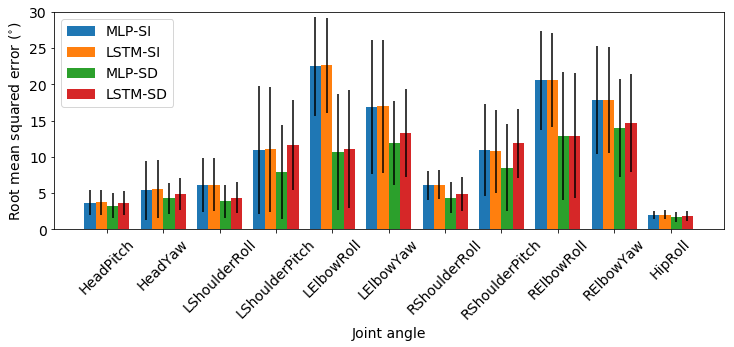

In [4]:
####################################################################################
# Show bar plot - RMSE by angles

from evalutils import angles_names
import matplotlib
matplotlib.rcParams.update({'font.size': 14})
def plot_4RMSE(rmses_byAngles, labels, stds=[], y_max=28.):
    
    N_series = len(labels)
    N_angles = len(rmses_byAngles[0])
    xaxis = np.arange(N_angles)
    w = 0.2 # bar width
    plt.figure(figsize=(12,4))
#     plt.figure()
    for i in range(N_series):
        if len(stds) == 0:
            plt.bar(xaxis - 0.5*N_series*w + i*w, rmses_byAngles[i], width=w, align='edge', label=labels[i])
        else:
            plt.bar(xaxis - 0.5*N_series*w + i*w, rmses_byAngles[i], yerr=stds[i], width=w, align='edge', label=labels[i])
    plt.ylabel('Root mean squared error ($^{\circ}$)') #, fontsize=14)
    plt.xlabel('Joint angle')
    plt.xticks(xaxis, angles_names[:N_angles], rotation=45)
    plt.ylim(0, y_max)
    plt.legend(loc='upper left')
    plt.show()

RMSEbyAngles_means = []
RMSEbyAngles_stds = []

for m in model_types:
    RMSEbyAngles_means.append( 
        np.mean( DATA[m][:, 5:], axis=0 ) # average over subjects, keep 11 angles
    )
    RMSEbyAngles_stds.append( 
        np.std( DATA[m][:, 5:], axis=0 ) # average over subjects, keep 11 angles
    )

plot_4RMSE(RMSEbyAngles_means, model_types_tab, RMSEbyAngles_stds, y_max=30)

In [13]:
####################################################################################
# Significance testing: for every measure, all pairs of models
from evalutils import statistical_significance

measures = ['Loss', 'RMSE', 'deltaLCCAxy', 'LCCAyy', 'deltaJerk']
for i in range(5):
    for i1, m1 in enumerate(model_types):
        for i2, m2 in enumerate(model_types):
            #if i1 < i2: # don't repeat
            if i1 < i2 and m1[-2:] == m2[-2:]: # don't repeat & compare only MLP vs LSTM
#             if i1 < i2 and m1[:3] == m2[:3]: # don't repeat & compare only SI vs SD

                
                print "--------------------------------------------------\n", measures[i], ":\t", m1, " x ", m2
                statistical_significance( DATA[m1][:, i], DATA[m2][:, i], p_diff=0.05, verbose=False )


--------------------------------------------------
Loss :	MLP SI  x  LSTM SI
	-0.006042026663912195 0.9952125993369825
	 samples A and B are NOT significantly different
--------------------------------------------------
Loss :	MLP SD  x  LSTM SD
	-0.24567322972499991 0.8073313815238883
	 samples A and B are NOT significantly different
--------------------------------------------------
RMSE :	MLP SI  x  LSTM SI
	0.0031111386035124243 0.9975348579234101
	 samples A and B are NOT significantly different
--------------------------------------------------
RMSE :	MLP SD  x  LSTM SD
	-0.7447730517081018 0.461251595058771
	 samples A and B are NOT significantly different
--------------------------------------------------
deltaLCCAxy :	MLP SI  x  LSTM SI
	-9.506920829107784 2.840986353698197e-10
	 samples A and B are significantly different
--------------------------------------------------
deltaLCCAxy :	MLP SD  x  LSTM SD
	-7.150905727966047 2.4979929684367943e-08
	 samples A and B are signifi

In [11]:
####################################################################################
# Significance testing: for every measure, all pairs of models
from evalutils import statistical_significance

measures = ['Loss', 'RMSE', 'deltaLCCAxy', 'LCCAyy', 'deltaJerk']
for i in range(5):
    for i1, m1 in enumerate(model_types):
        for i2, m2 in enumerate(model_types):
#             if i1 < i2:
#             if i1 < i2 and m1[-2:] == m2[-2:]: # don't repeat & compare only MLP vs LSTM
            if i1 < i2 and m1[:3] == m2[:3]: # don't repeat & compare only SI vs SD
                print "--------------------------------------------------\n", measures[i], ":\t", m1, " x ", m2
                statistical_significance( DATA[m1][:, i], DATA[m2][:, i], p_diff=0.001, verbose=False )


--------------------------------------------------
Loss :	MLP SI  x  MLP SD
	3.43280428635862 0.0016283850428930409
	 samples A and B are NOT significantly different
--------------------------------------------------
Loss :	LSTM SI  x  LSTM SD
	3.282617096197532 0.0023851852415481883
	 samples A and B are NOT significantly different
--------------------------------------------------
RMSE :	MLP SI  x  MLP SD
	3.0800116657437244 0.003951667287443146
	 samples A and B are NOT significantly different
--------------------------------------------------
RMSE :	LSTM SI  x  LSTM SD
	2.427201245208126 0.020357534063850612
	 samples A and B are NOT significantly different
--------------------------------------------------
deltaLCCAxy :	MLP SI  x  MLP SD
	-2.303455112781176 0.027184942755385442
	 samples A and B are NOT significantly different
--------------------------------------------------
deltaLCCAxy :	LSTM SI  x  LSTM SD
	-2.55183496937136 0.016109476445355347
	 samples A and B are NOT signi